In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris_data = pd.read_csv('Iris.csv')

In [3]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris_data = iris_data.sample(frac=1)
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
4,5.0,3.6,1.4,0.2,setosa
146,6.3,2.5,5.0,1.9,virginica
11,4.8,3.4,1.6,0.2,setosa
57,4.9,2.4,3.3,1.0,versicolor
75,6.6,3.0,4.4,1.4,versicolor


In [5]:
X = iris_data.drop(columns='species', axis=1)
Y = iris_data['species']
print(X)

print(Y)

     sepal_length  sepal_width  petal_length  petal_width
4             5.0          3.6           1.4          0.2
146           6.3          2.5           5.0          1.9
11            4.8          3.4           1.6          0.2
57            4.9          2.4           3.3          1.0
75            6.6          3.0           4.4          1.4
..            ...          ...           ...          ...
42            4.4          3.2           1.3          0.2
18            5.7          3.8           1.7          0.3
136           6.3          3.4           5.6          2.4
80            5.5          2.4           3.8          1.1
37            4.9          3.1           1.5          0.1

[150 rows x 4 columns]
4          setosa
146     virginica
11         setosa
57     versicolor
75     versicolor
          ...    
42         setosa
18         setosa
136     virginica
80     versicolor
37         setosa
Name: species, Length: 150, dtype: object


In [6]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [7]:
X = np.asarray(X)

In [8]:
# PCA from scratch
def PCA(X, n_components=2):#you can select any number of components.
    X_meaned = X - np.mean(X , axis = 0)
    cov_mat = np.cov(X_meaned , rowvar = False)

    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

    #sort the eigenvalues in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]

    #similarly sort the eigenvectors
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    eigenvector_subset = sorted_eigenvectors[:,0:n_components]

    X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()
    #reconstruction
    X_reconstructed = np.dot(X_reduced,eigenvector_subset.transpose())+np.mean(X, axis=0)
    return X_reduced, X_reconstructed

In [9]:
reduced_data, reconstructed_data = PCA(X, 2)

In [10]:
print(reduced_data.shape)

(150, 2)


In [11]:
X = reduced_data
print(X)

[[ 2.72859298  0.33392456]
 [-1.52566363 -0.37502085]
 [ 2.61314272  0.02152063]
 [ 0.75146714 -1.00110751]
 [-0.89964086  0.32961098]
 [-1.16885347 -0.1645025 ]
 [ 0.30733476 -0.36508661]
 [ 2.67384469 -0.1066917 ]
 [ 2.82089068 -0.08210451]
 [-2.34975798 -0.04188255]
 [-1.94401705  0.18741522]
 [-1.5852673  -0.53930705]
 [ 2.64354322  1.1861949 ]
 [-3.49926548  0.45677347]
 [-3.48876538  1.17154454]
 [ 2.59032303  0.23605934]
 [-2.84096093  0.37274259]
 [ 2.98184266 -0.48025005]
 [-2.16537886  0.21528028]
 [-2.9320051   0.35237701]
 [ 0.90846333 -0.75156873]
 [ 0.01019007 -0.72057487]
 [-1.77964011 -0.50146479]
 [-0.37523823 -0.29162202]
 [ 2.3105317   0.39786782]
 [-2.61419383  0.55836695]
 [ 2.77013891  0.27105942]
 [-2.31430339  0.18260885]
 [ 2.38386932  1.34475434]
 [-1.41407223 -0.57492506]
 [ 2.50652679  0.65193501]
 [-1.46406132  0.50418983]
 [ 2.30312854  0.10552268]
 [-0.13499495 -0.31170964]
 [-1.90486293  0.04804751]
 [-0.23454059 -0.33192183]
 [ 0.19188449 -0.67749054]
 

In [12]:
Y = np.asarray(Y)
print(Y)

['setosa' 'virginica' 'setosa' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'setosa' 'setosa' 'virginica' 'virginica' 'virginica'
 'setosa' 'virginica' 'virginica' 'setosa' 'virginica' 'setosa'
 'virginica' 'virginica' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica' 'setosa'
 'virginica' 'setosa' 'versicolor' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'virginica' 'virginica' 'virginica'
 'versicolor' 'versicolor' 'setosa' 'virginica' 'virginica' 'setosa'
 'virginica' 'versicolor' 'virginica' 'setosa' 'versicolor' 'virginica'
 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'setosa' 'virginica' 'versicolor' 'virginica' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'virginica' 'versicolor' 'virginica' 'virginica' 'setosa' 'versicolor'
 'virginica' 'setosa' 'virginica' 'setosa' 'versicolor' 'virginica'
 'virginica' 'setosa' 'versicolor'

In [13]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [14]:
class KMeans:

    def __init__(self, K=3, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]

        # the centers (mean vector) for each cluster
        self.centroids = []


    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # optimize clusters
        for _ in range(self.max_iters):
            # assign samples to the closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels


    def _create_clusters(self, centroids):
        # assign the samples to the closest centroids
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx


    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between old and new centroids, for all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

(150, 2)
3


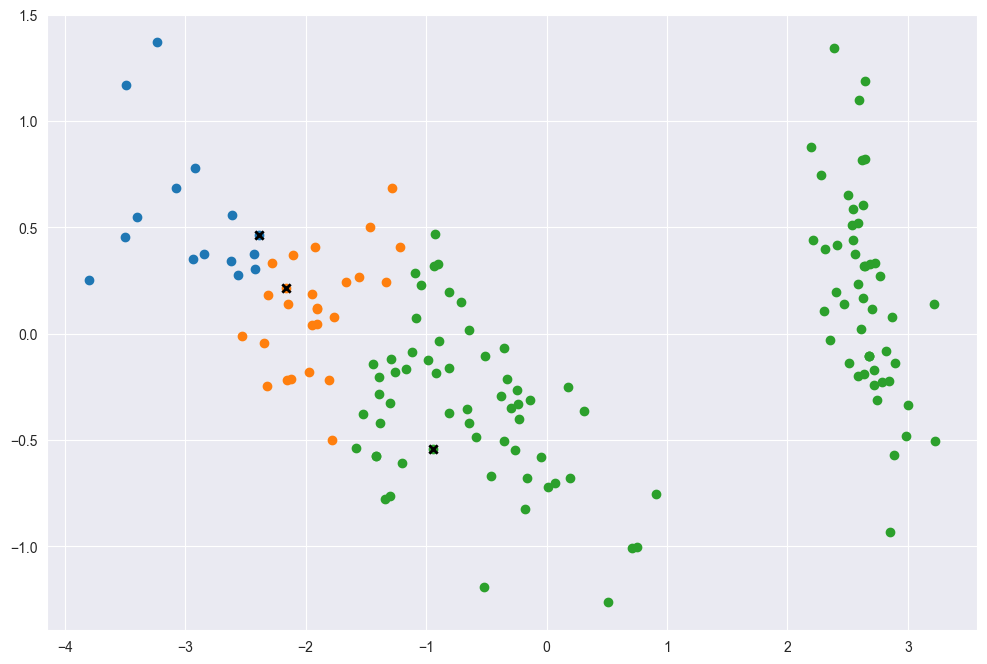

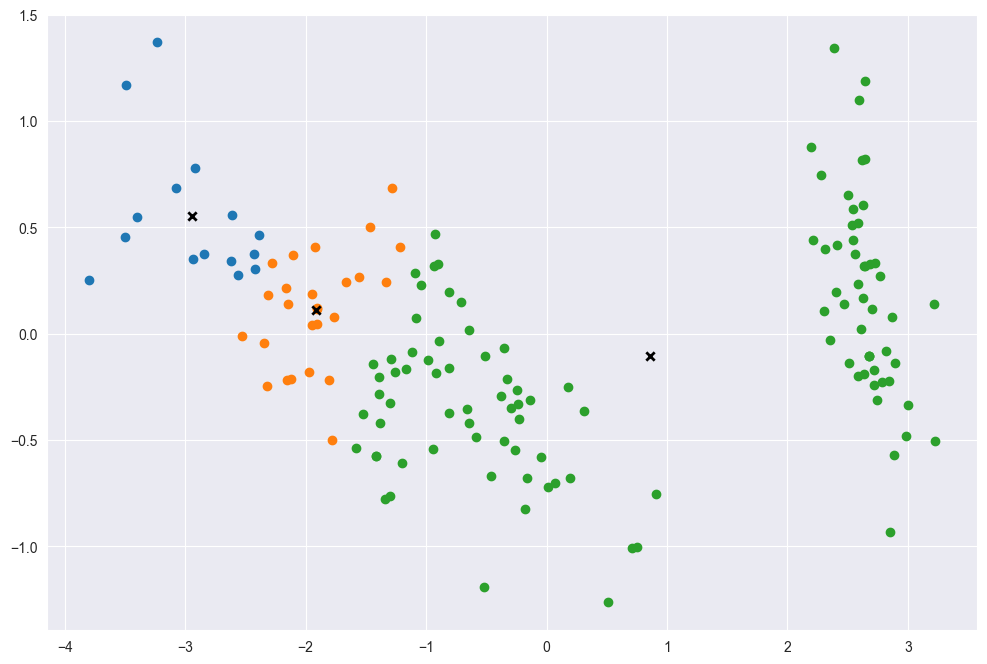

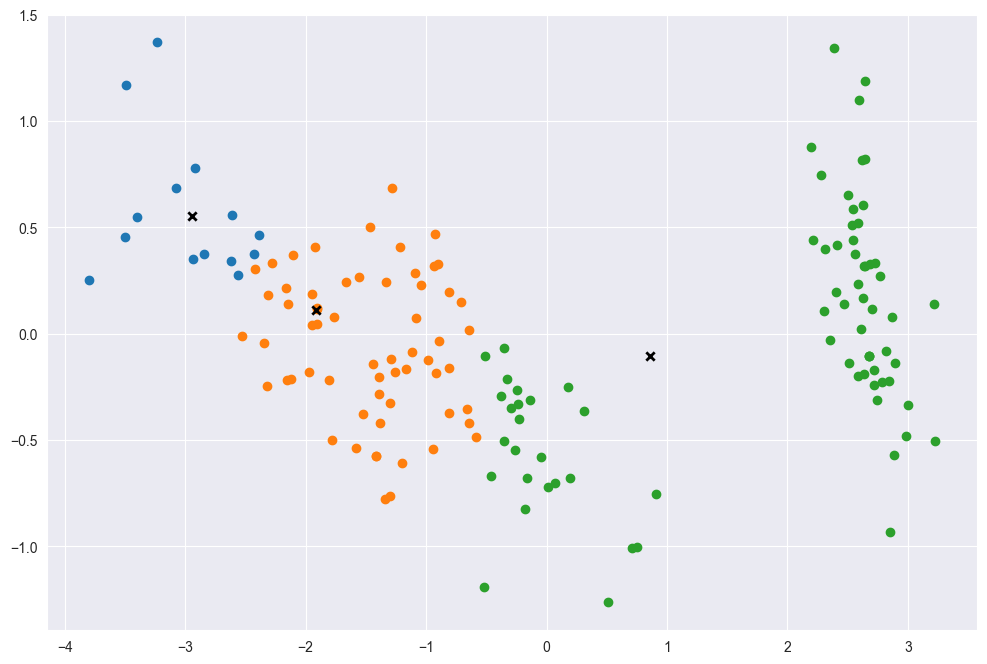

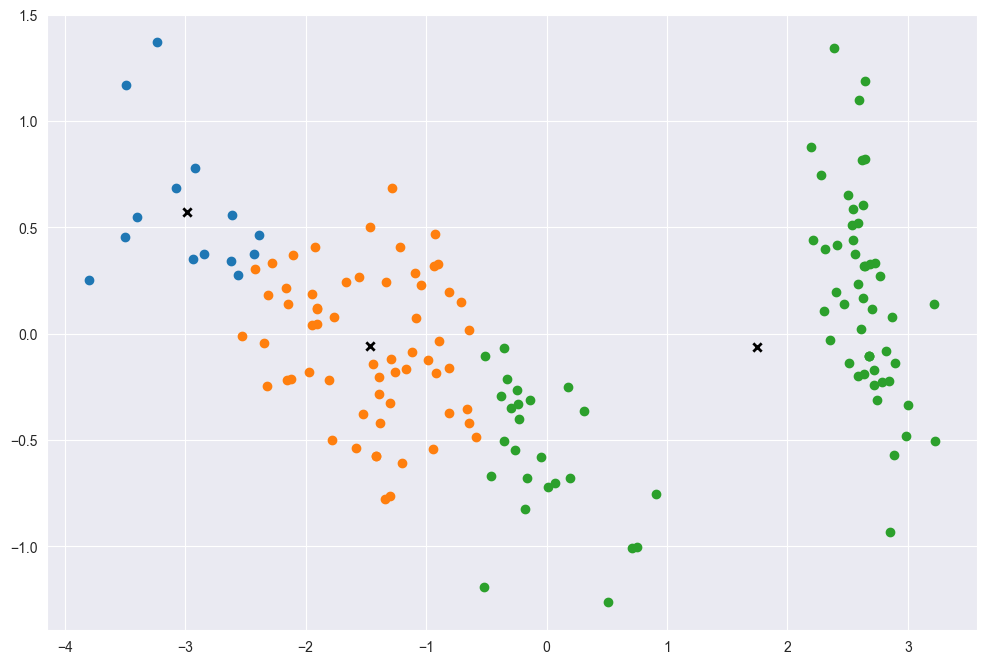

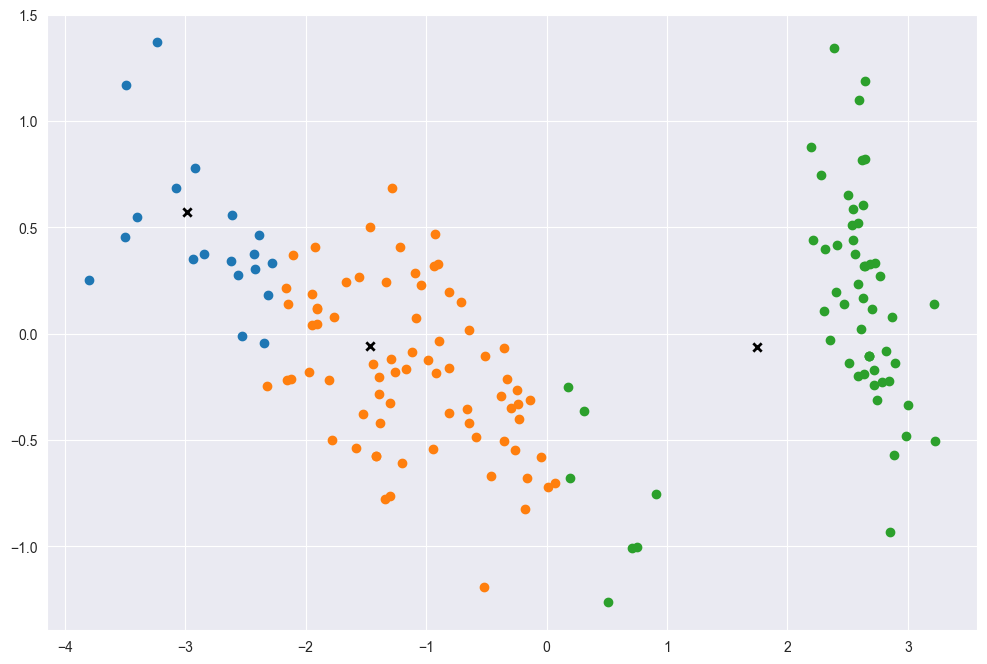

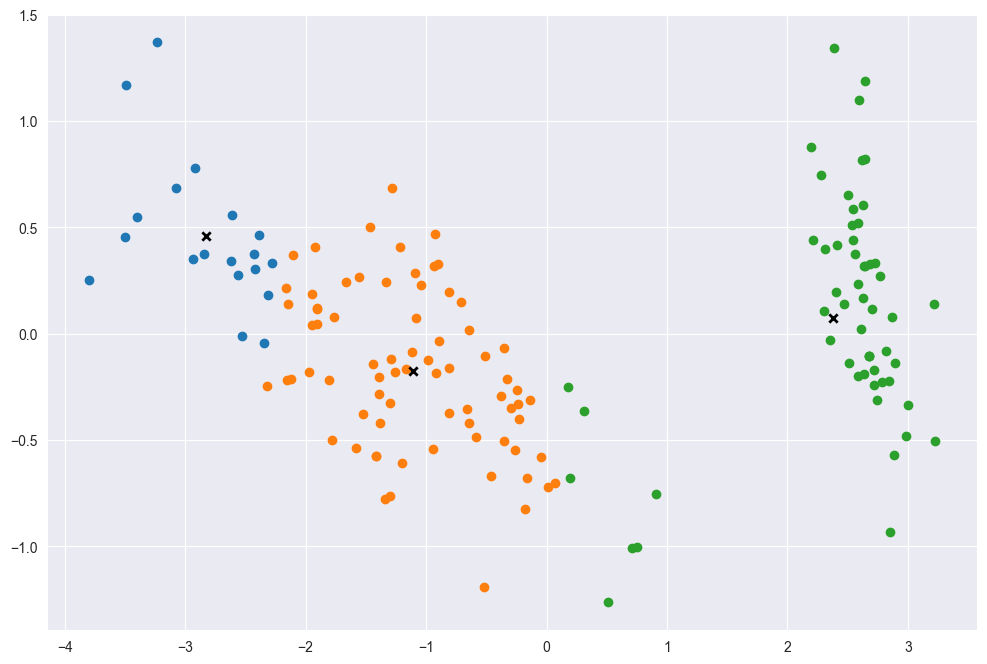

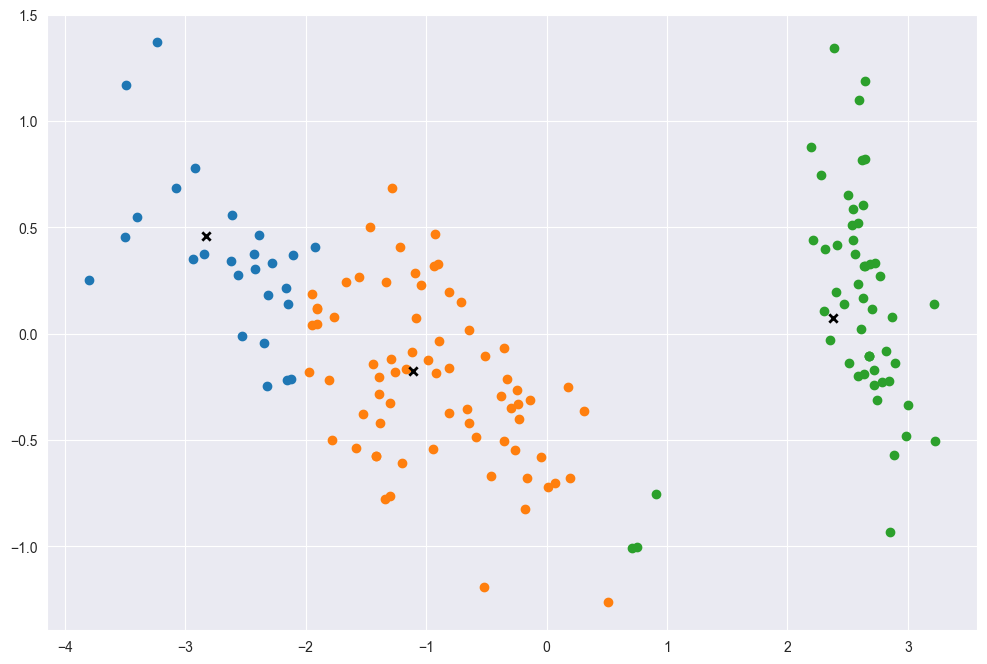

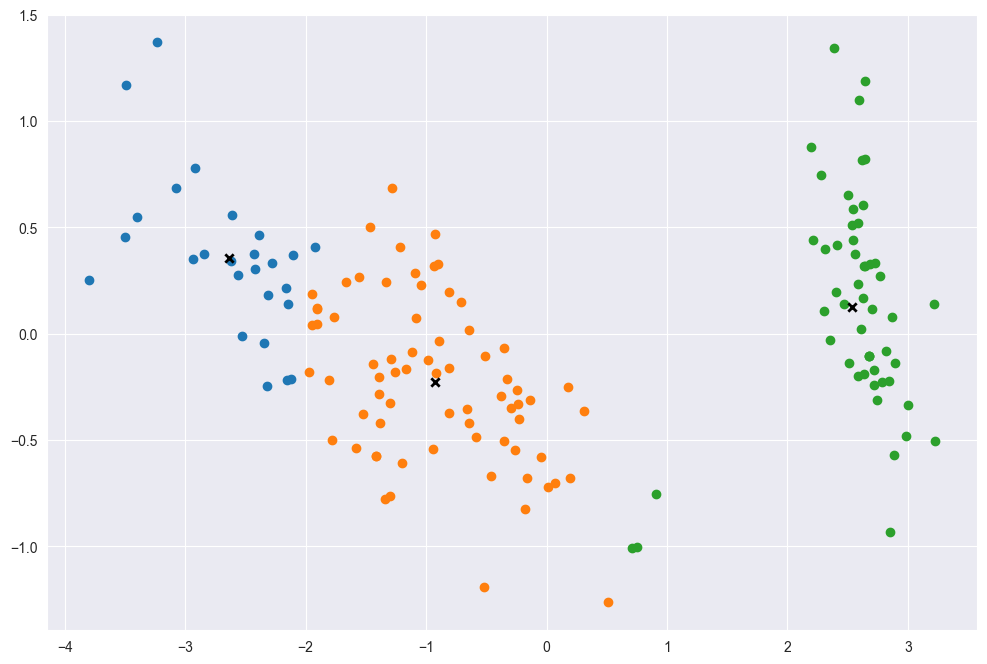

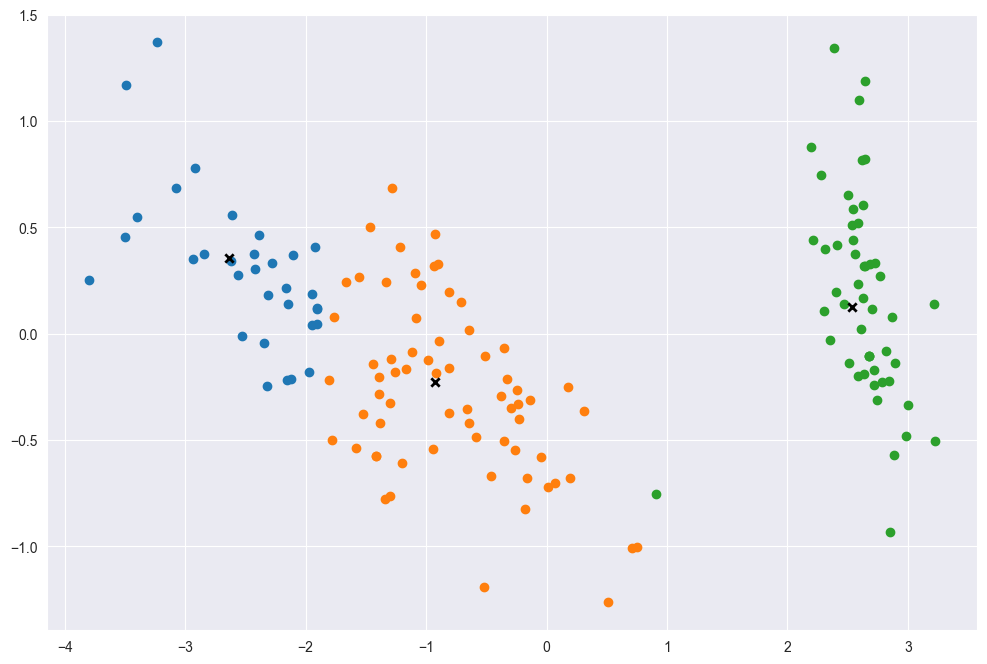

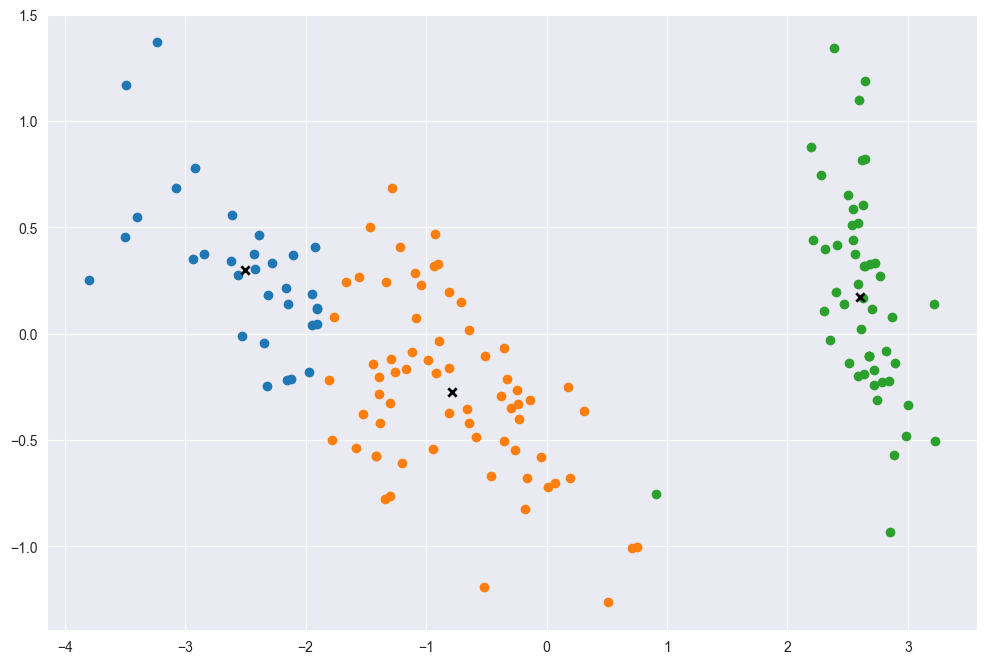

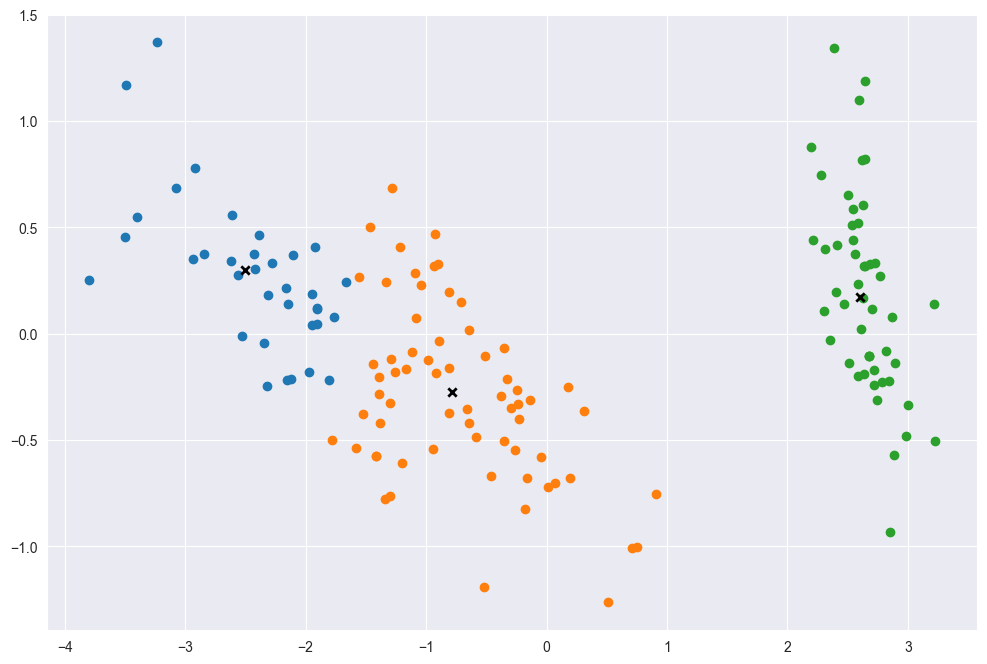

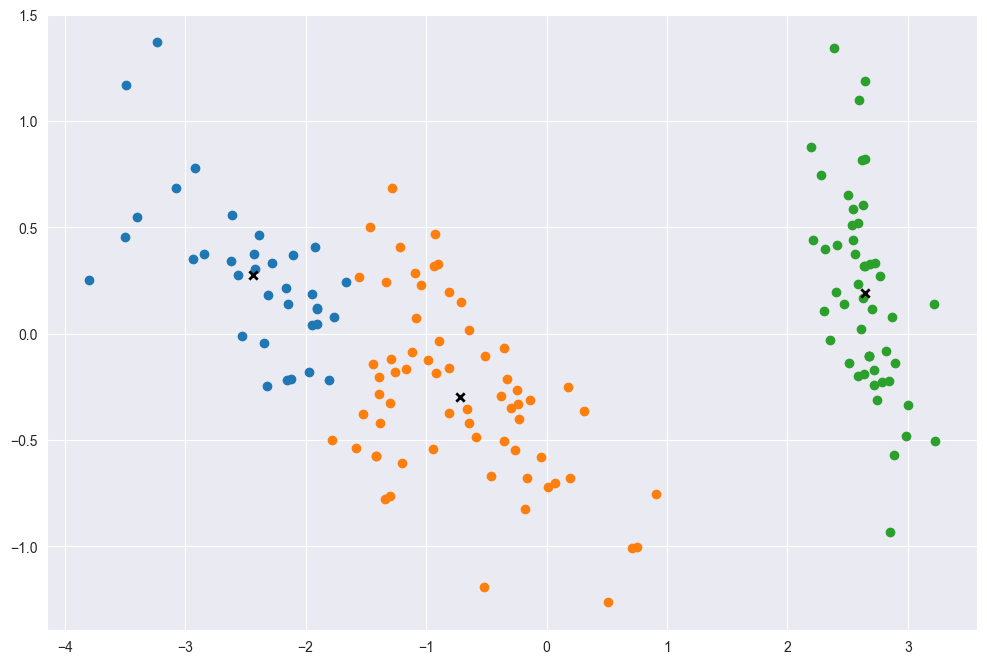

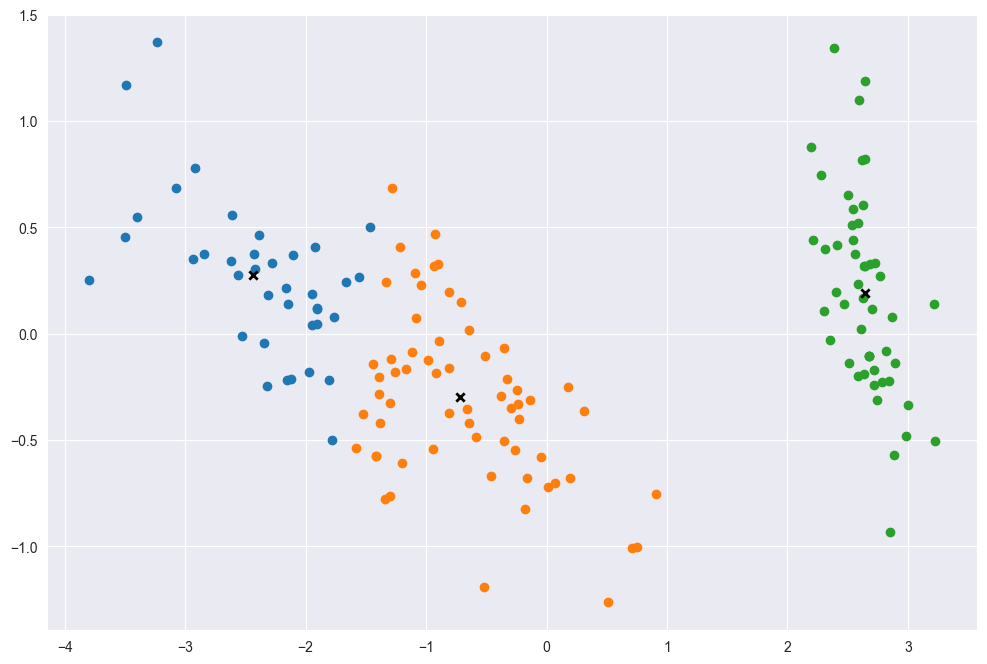

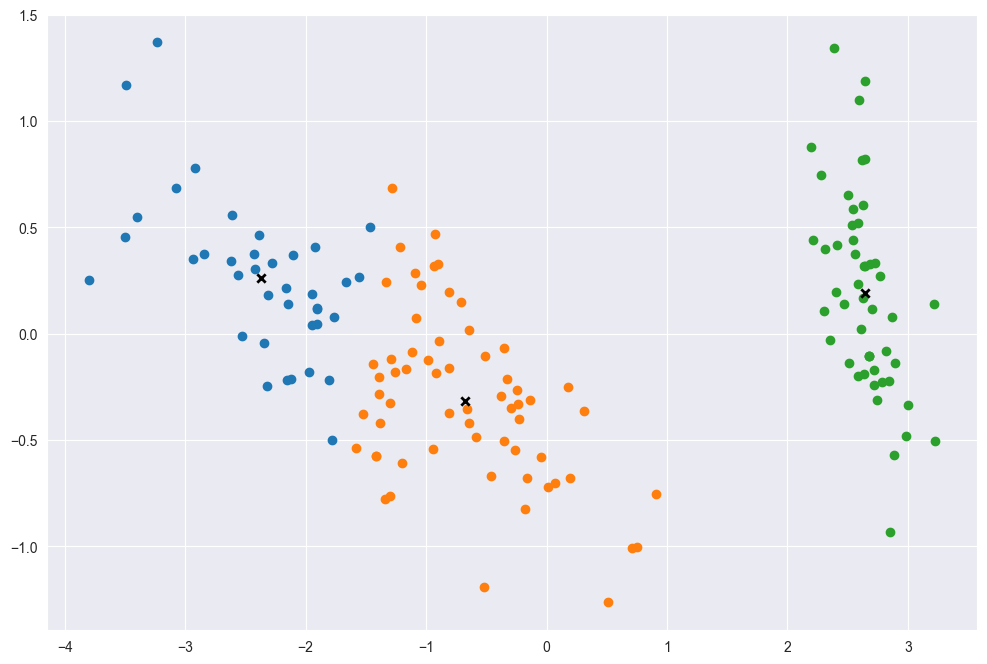

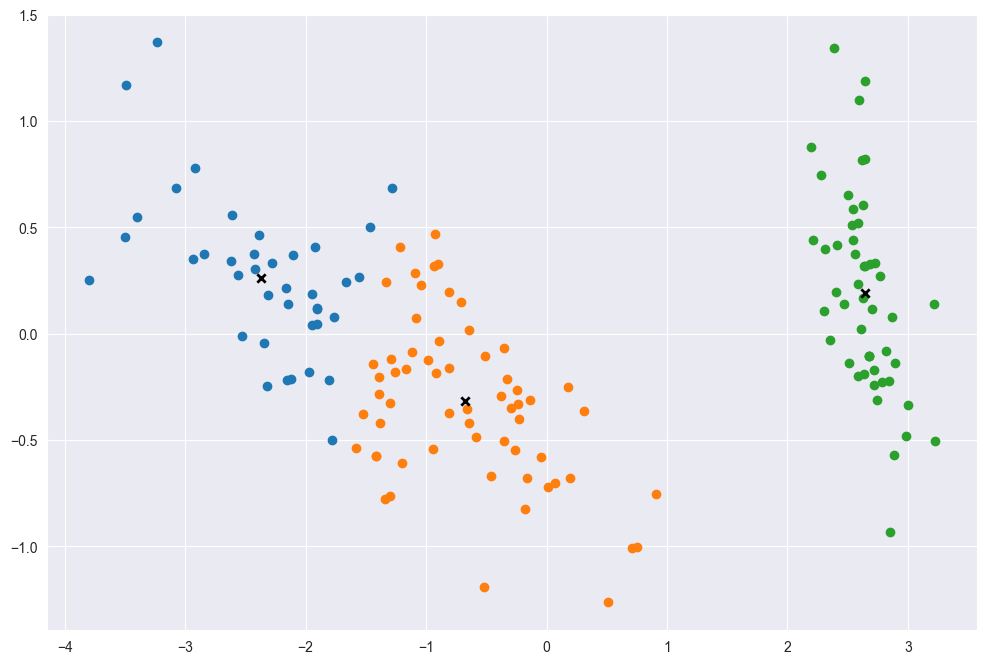

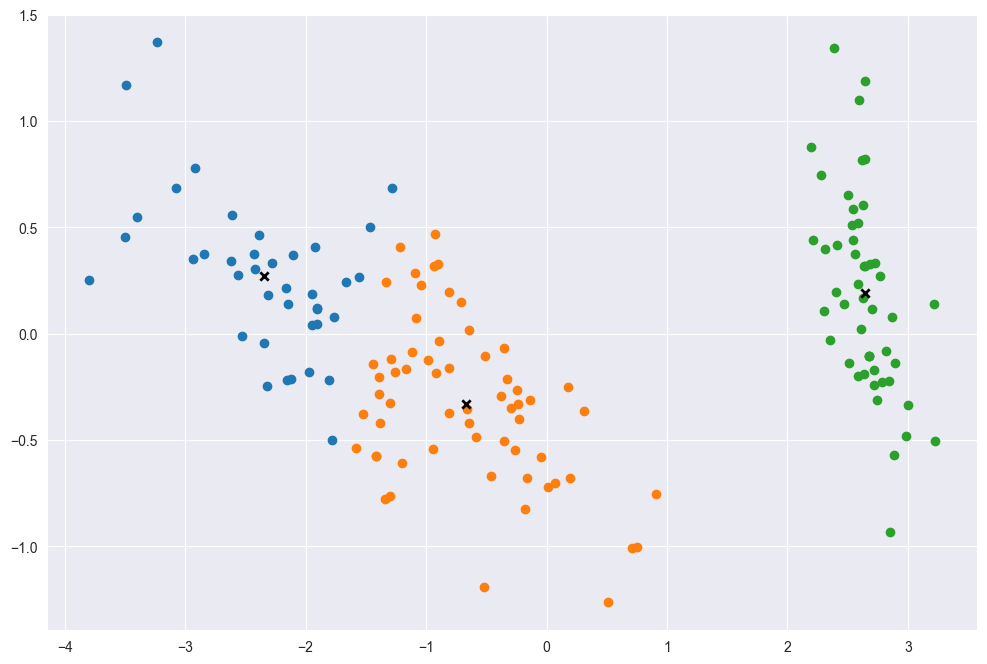

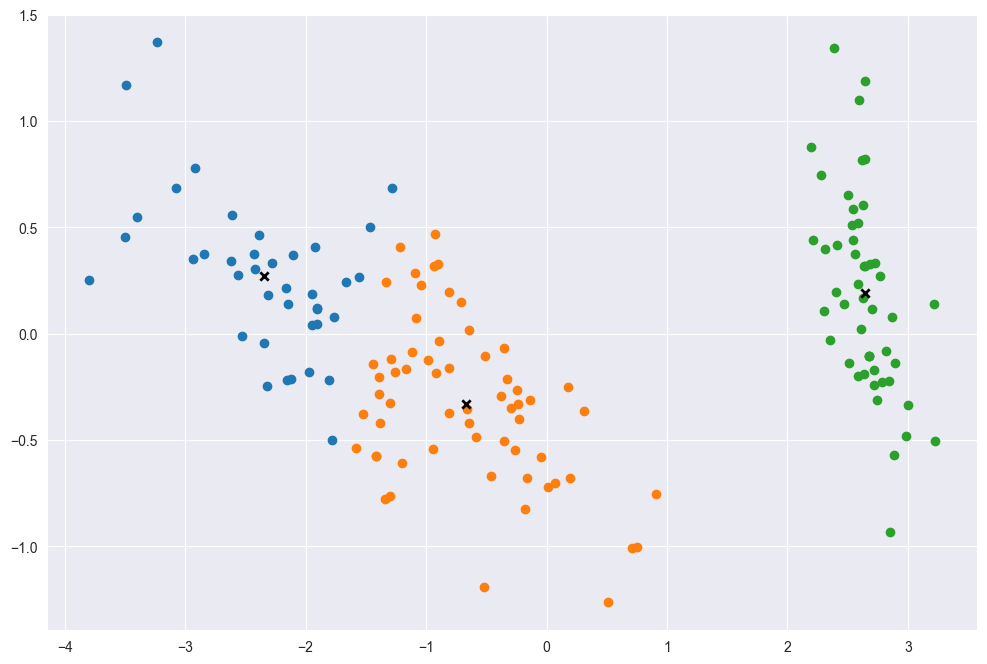

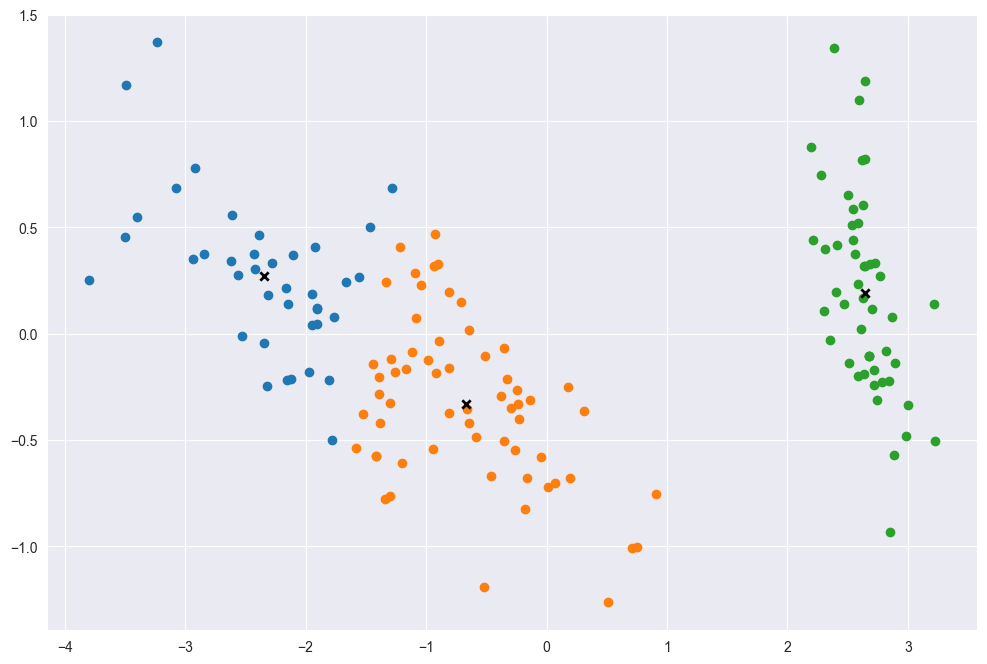

In [15]:
# Testing
if __name__ == "__main__":
    np.random.seed(42)

    print(X.shape)

    clusters = len(np.unique(Y))
    print(clusters)

    k = KMeans(K=clusters, max_iters=150, plot_steps=True)
    y_pred = k.predict(X)

    k.plot()

In [ ]:
print(X)

In [ ]:
print(Y)